In [2]:
import csv
import pandas as pd
import numpy as np
import plotnine
import seaborn as sns
from plotnine import *
from plotnine.data import *
import warnings
warnings.filterwarnings("ignore")
import matplotlib.style as style
style.use('seaborn-poster')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_csv('RefRunFullInf.csv',sep=',', skiprows=6, error_bad_lines=False)
ValueData = pd.read_csv('ValueStrength.csv',sep=',', skiprows=6, error_bad_lines=False)

In [4]:
Data.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                     'AllStudents_TotalTickChangeBel':'TotalBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)
ValueData.rename(columns={'[run number]':'run', '[step]' : 'tick' ,
                     '[plot_belief] of student 7' : 'belief', '[name] of student 7' : 'name', '[Vstrength] of student 7' : 'ValueStrength'},inplace=True)



In [4]:
#Subsetting dataset to datasets with only certain value-mode combinations (for the heat map later in this script)
Rel = Data[Data.Inspect_Variable == "Relaxation"]
Eff = Data[Data.Inspect_Variable == "Efficiency"]
Flex = Data[Data.Inspect_Variable == "Flexibility"]
Env = Data[Data.Inspect_Variable == "Environment"]
Fun = Data[Data.Inspect_Variable == "Fun"]
Safety = Data[Data.Inspect_Variable == "Safety"]
Comf = Data[Data.Inspect_Variable == "Comfort"]


CarRel1 = Rel[Rel.Inspect_Transportmode == "Car"]
CarEff1 = Eff[Eff.Inspect_Transportmode == "Car"]
CarFlex1 = Flex[Flex.Inspect_Transportmode == "Car"]
CarEnv1 = Env[Env.Inspect_Transportmode == "Car"]
CarFun1 = Fun[Fun.Inspect_Transportmode == "Car"]
CarSafety1 = Safety[Safety.Inspect_Transportmode == "Car"]
CarComf1 = Comf[Comf.Inspect_Transportmode == "Car"]

BikeRel1 = Rel[Rel.Inspect_Transportmode == "Bike"]
BikeEff1 = Eff[Eff.Inspect_Transportmode == "Bike"]
BikeFlex1 = Flex[Flex.Inspect_Transportmode == "Bike"]
BikeEnv1 = Env[Env.Inspect_Transportmode == "Bike"]
BikeFun1 = Fun[Fun.Inspect_Transportmode == "Bike"]
BikeSafety1 = Safety[Safety.Inspect_Transportmode == "Bike"]
BikeComf1 = Comf[Comf.Inspect_Transportmode == "Bike"]

BusRel1 = Rel[Rel.Inspect_Transportmode == "Bus"]
BusEff1 = Eff[Eff.Inspect_Transportmode == "Bus"]
BusFlex1 = Flex[Flex.Inspect_Transportmode == "Bus"]
BusEnv1 = Env[Env.Inspect_Transportmode == "Bus"]
BusFun1 = Fun[Fun.Inspect_Transportmode == "Bus"]
BusSafety1 = Safety[Safety.Inspect_Transportmode == "Bus"]
BusComf1 = Comf[Comf.Inspect_Transportmode == "Bus"]

In [5]:
# The standard deviations of variables
StandardDeviations = Data.std()
StandardDeviations = StandardDeviations[11:19]
StandardDeviations

ShareInfluenced        12.030278
SizeRefGroup            0.316707
Share of car users      0.175143
Share of bike users     0.111384
Share of bus users      0.100460
MeanBeliefChange        0.015893
zero                    2.580869
one                     1.921336
dtype: float64

### Making a dataframe with average values over all runs

In [5]:
Data =Data.sort_values('tick')
import warnings
warnings.filterwarnings("ignore")
NumTicks = np.arange(0, 1502)

Average = pd.DataFrame(columns= ['Tick', 'MeanBelief','MeanStud', 'MeanBeliefShift', 'MeanBus', 'MeanBike', 'MeanCar', 'CountStud'])
Tick = []
MeanBelief = []
MeanStud = []
MeanBeliefShift = []
MeanBus = []
MeanBike = []
MeanCar = []


for i in NumTicks:
    low = (i-1)*2100
    high = i *2100
    Now = Data[low:high]
    meanbelief = Now['belief'].mean(axis=0)
    meanstud = Now['SizeRefGroup'].mean(axis=0)
    meanbeliefshift = Now['MeanBeliefChange'].mean(axis=0)
    meanbus = Now['Share of bus users'].mean(axis=0)
    meanbike = Now['Share of bike users'].mean(axis=0)
    meancar = Now['Share of car users'].mean(axis=0)
    
    
    Tick.append(i)
    MeanBelief.append(meanbelief)
    MeanStud.append(meanstud)
    MeanBeliefShift.append(meanbeliefshift)
    MeanBus.append(meanbus)
    MeanBike.append(meanbike)
    MeanCar.append(meancar)
    
    
    
Average.Tick = Tick
Average.MeanBelief = MeanBelief
Average.MeanStud = MeanStud
Average.MeanBeliefShift = MeanBeliefShift
Average.MeanBus = MeanBus
Average.MeanBike = MeanBike
Average.MeanCar = MeanCar



Average['MeanBelief'][0] = 0
Average['MeanStud'][0] = 0
Average['MeanBeliefShift'][0] = 0
Average['MeanBus'][0] = 0
Average['MeanBike'][0] = 0
Average['MeanCar'][0] = 0

In [6]:
def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()
def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()


In [7]:
#Determining plot themes
theme_set(
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45))
    )
plotnine.themes.element_line (size = 0.001)
plotnine.themes.themeable.panel_spacing_x(5)

### The share of socially influenced students

In [41]:
InfluencesHist = (ggplot(Data.dropna(subset=['ShareInfluenced'])) 
       + geom_histogram(
           aes(x='ShareInfluenced'),
                        color = 'grey', size=2
                       
           ) +
    labs(
        title ='Influenced population',
        x = 'Share of influenced students',
         y = 'Count',
    ) 
      + 
    geom_vline(aes(xintercept = Data.ShareInfluenced.mean()), linetype = 'dashed',  color = 'green'))

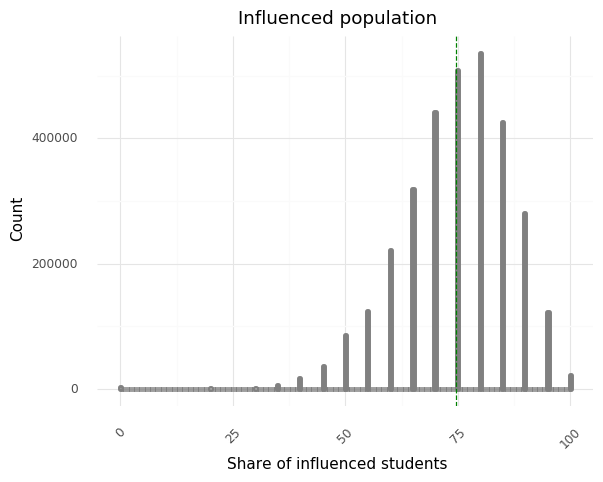

<ggplot: (292502911)>

In [42]:
InfluencesHist

### Belief change per evaluation moment

In [211]:
figchangebeliefs = (
    ggplot(Average ) 
    +
    stat_smooth(aes(x='Tick', y='MeanBeliefShift'), method ='loess')
    +
    labs(
        title ='Change in beliefs',
        x = 'tick',
         y = 'Relative change in beliefs') )

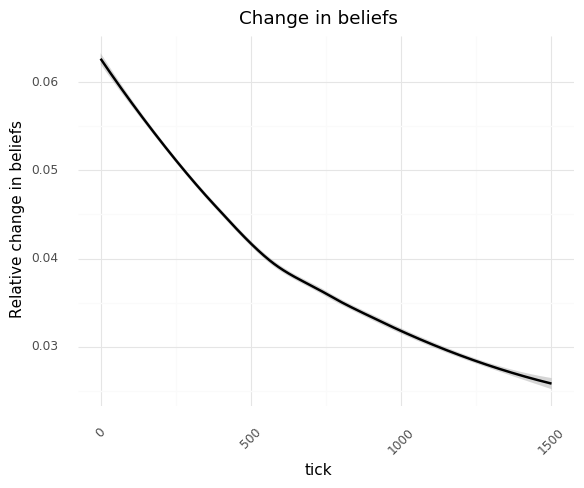

<ggplot: (291001292)>

In [212]:
figchangebeliefs

### Opinion space

#### Color of lines determined by value strengths

In [11]:
#Opinion dynamics for all mode-value combinations
OpinionSpaceValues =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'ValueStrength')) 
         +
  geom_line(data=ValueData, size=0.5, alpha = 0.8) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_grid(['Inspect_Variable', 'Inspect_Transportmode'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ) +
   scale_colour_gradient(low="orange", high="navy") )

 
    

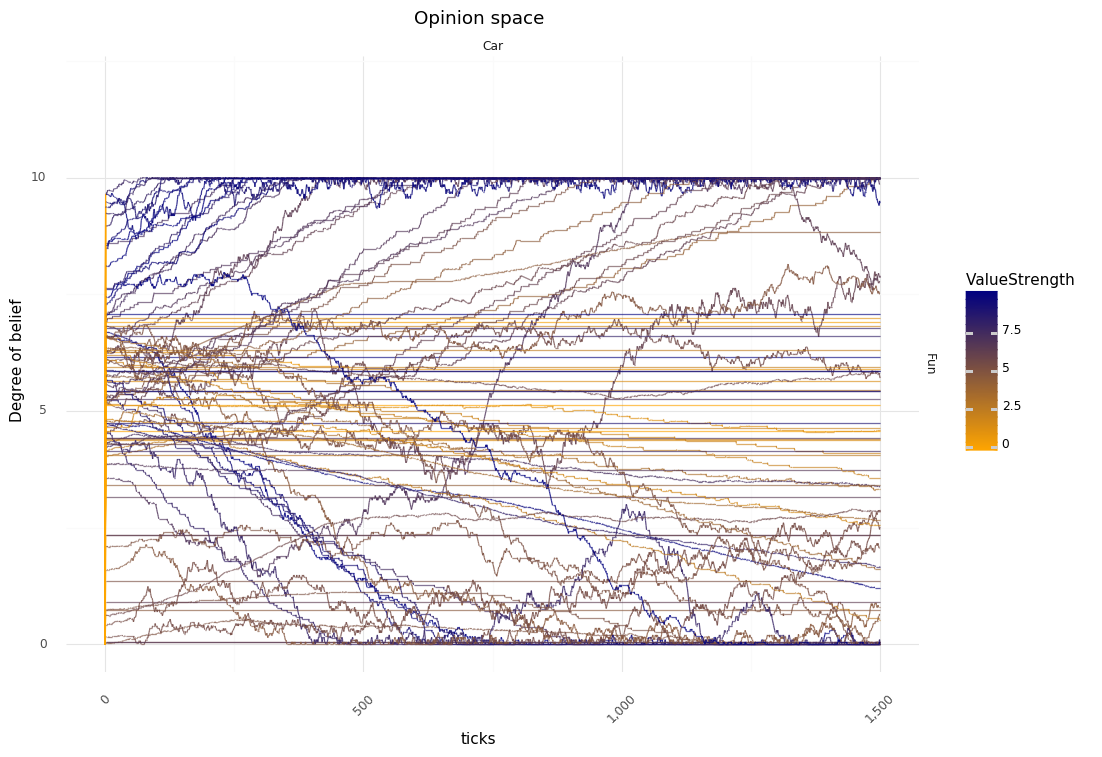

<ggplot: (-9223372036564405998)>

In [12]:
OpinionSpaceValues

#### Color of lines determined by student travel type

In [221]:
#Opinion dynamics for all mode-value combinations

OpinionSpace =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'name')) 
         +
  geom_line(data=Data, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_grid(['Inspect_Variable', 'Inspect_Transportmode'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ))


 
    

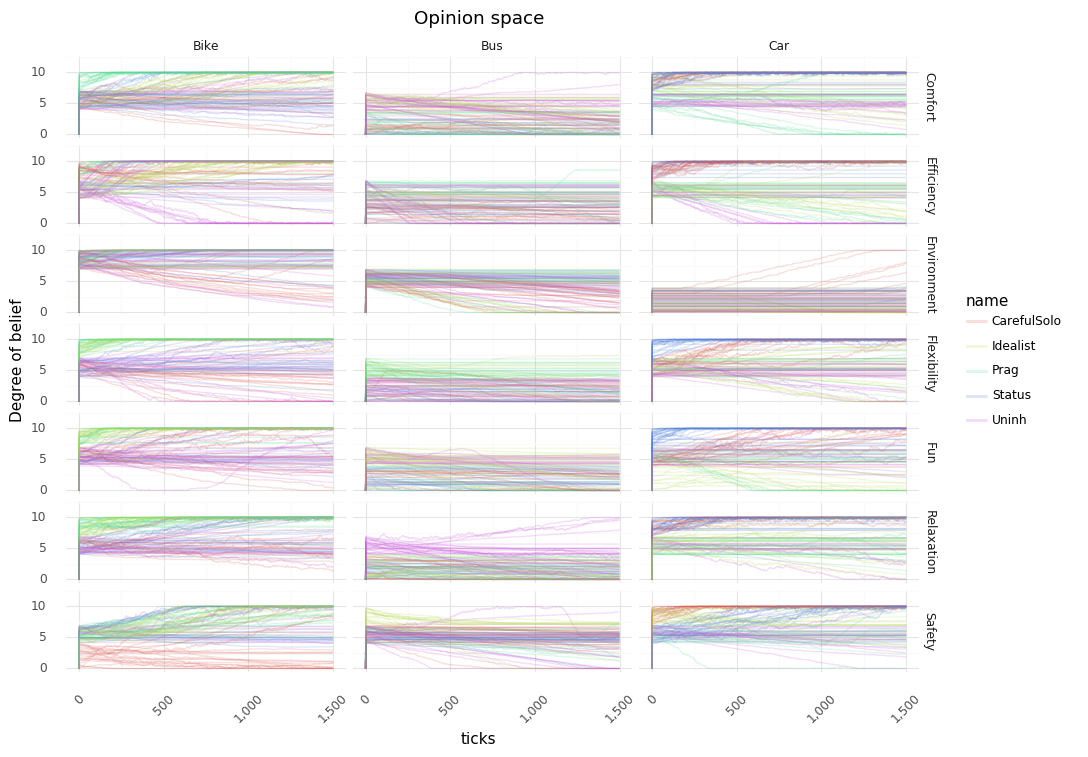

<ggplot: (-9223372036561487188)>

In [222]:
OpinionSpace

In [190]:
#Opinion dynamics for the car-flexibility combination, with lines representing the travel type of a student

OpinionSpaceCarFun =(ggplot(aes(x = 'tick', y='belief', group='run', color='name')) 
         +
  geom_line(data=CarFun1, size=0.5, alpha = 0.43) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) )

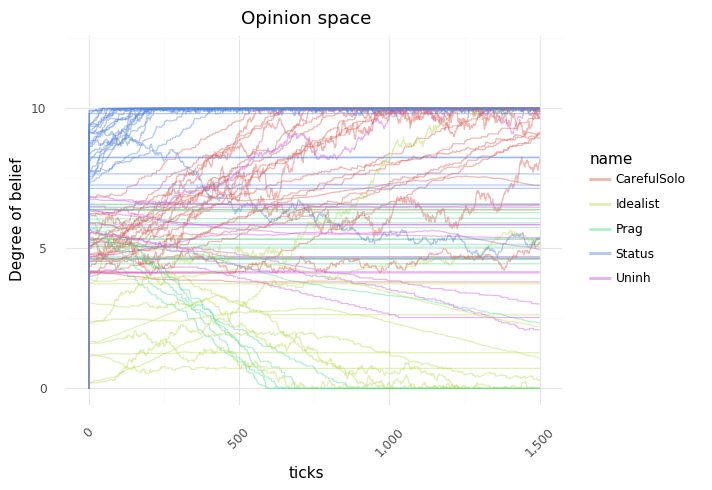

<ggplot: (312423509)>

In [180]:
OpinionSpaceCarFun

In [186]:
#Opinion dynamics for the bus-environment combination
OpinionSpaceEnvBus =(ggplot(aes(x = 'tick', y='belief', group='run', color='name')) 
         +
  geom_line(data=BusEnv1, size=0.5, alpha = 0.43) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) )

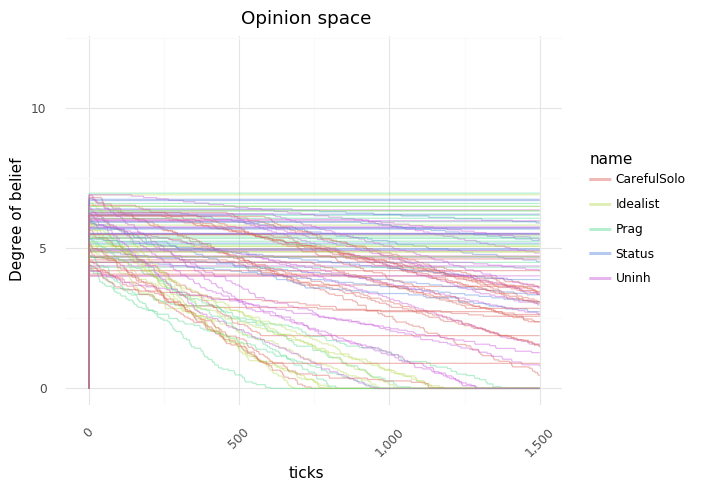

<ggplot: (356564435)>

In [187]:
OpinionSpaceEnvBus

### Mode shares

In [240]:
Sorted = CarFun1.sort_values('tick')

NumTicks = np.arange(0, 1502)

CarFun = pd.DataFrame(columns= ['Tick', 'Belief', 'Students'])
Tick = []
Belief = []
NumStuds = []  
Mode = []
Value = []


for i in NumTicks:
    low = (i-1)*100
    high = i *100
    Now = Sorted[low:high]
    zero = Now['zero'].mean(axis=0)
    one = Now['one'].mean(axis=0)
    two = Now['two'].mean(axis=0)
    three = Now['three'].mean(axis=0)
    four = Now['four'].mean(axis=0)
    five = Now['five'].mean(axis=0)
    six = Now['six'].mean(axis=0)
    seven = Now['seven'].mean(axis=0)
    eight = Now['eight'].mean(axis=0)
    nine = Now['nine'].mean(axis=0)

    
    Tick.append(i)
    Belief.append(0)
    NumStuds.append(zero)    

    Tick.append(i)
    Belief.append(1)
    NumStuds.append(one)
    
    Tick.append(i)
    Belief.append(2)
    NumStuds.append(two)
    
    Tick.append(i)
    Belief.append(3)
    NumStuds.append(three)   
   
    Tick.append(i)
    Belief.append(4)
    NumStuds.append(four)
    
    Tick.append(i)
    Belief.append(5)
    NumStuds.append(five)
    
    Tick.append(i)
    Belief.append(6)
    NumStuds.append(six)
    
    Tick.append(i)
    Belief.append(7)
    NumStuds.append(seven)
   
    Tick.append(i)
    Belief.append(8)
    NumStuds.append(eight)
   
    Tick.append(i)
    Belief.append(9)
    NumStuds.append(nine)
    
                    
CarFun.Tick = Tick
CarFun.Belief = Belief
CarFun.Students = NumStuds

In [241]:
CarFun = BikeComf.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       



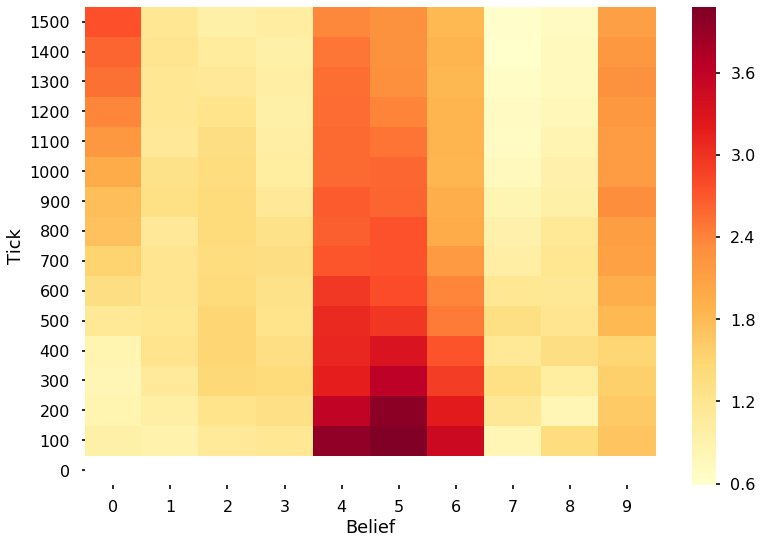

In [242]:
Data2 = CarFun.pivot("Tick", "Belief", "Students")
ax = sns.heatmap(Data2, cmap="YlOrRd")
ax.invert_yaxis()
plt.savefig('CarFunFullinfReal.jpg')
plt.show()

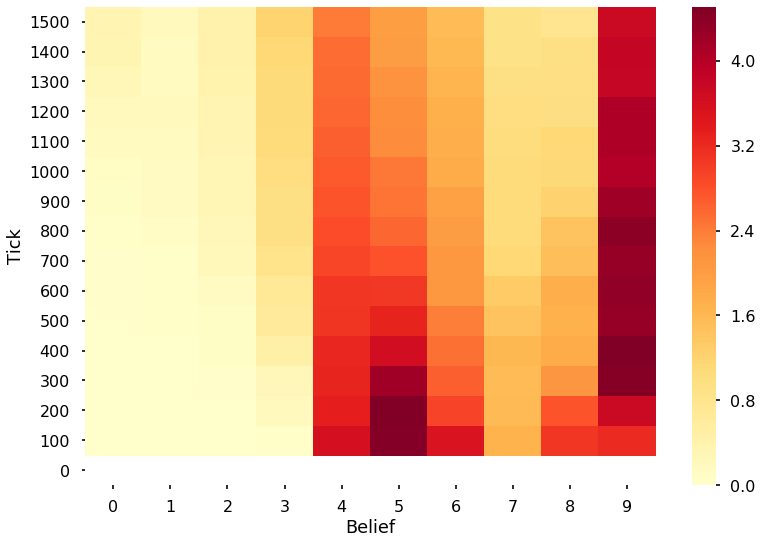

In [166]:
Data2 = BikeRel.pivot("Tick", "Belief", "Students")
ax = sns.heatmap(Data2, cmap="YlOrRd")
ax.invert_yaxis()
plt.show()

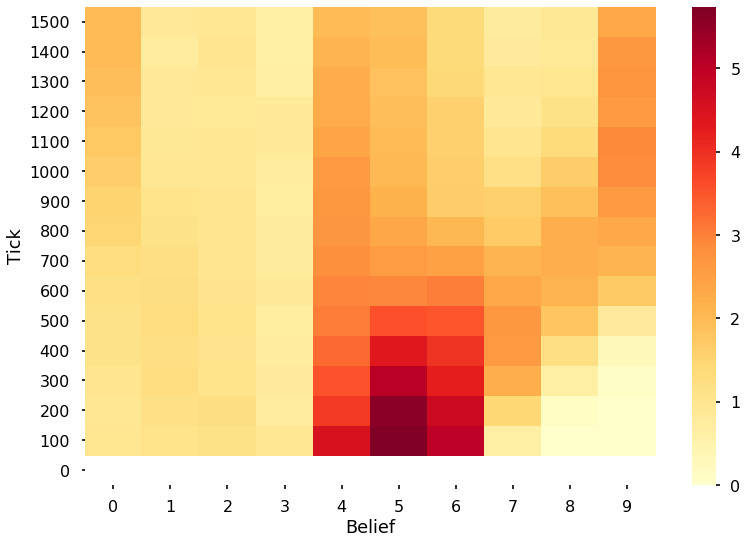

In [172]:
Data2 = BikeSafety.pivot("Tick", "Belief", "Students")
ax = sns.heatmap(Data2, cmap="YlOrRd")
ax.invert_yaxis()
plt.show()

In [231]:
ModeShares =(ggplot(Average, aes(x = 'Tick') )
         +
                  geom_line(aes(y = 'MeanCar'), color='blue') 
         +
                  geom_line(aes(y = 'MeanBike'), color='green') 
         +
                  geom_line(aes(y = 'MeanBus'), color='yellow') 
         +
    labs(
        title ='Mode choices',
        x = 'ticks',
         y = 'Mode share',
        figsize = (4,4)
    ) )

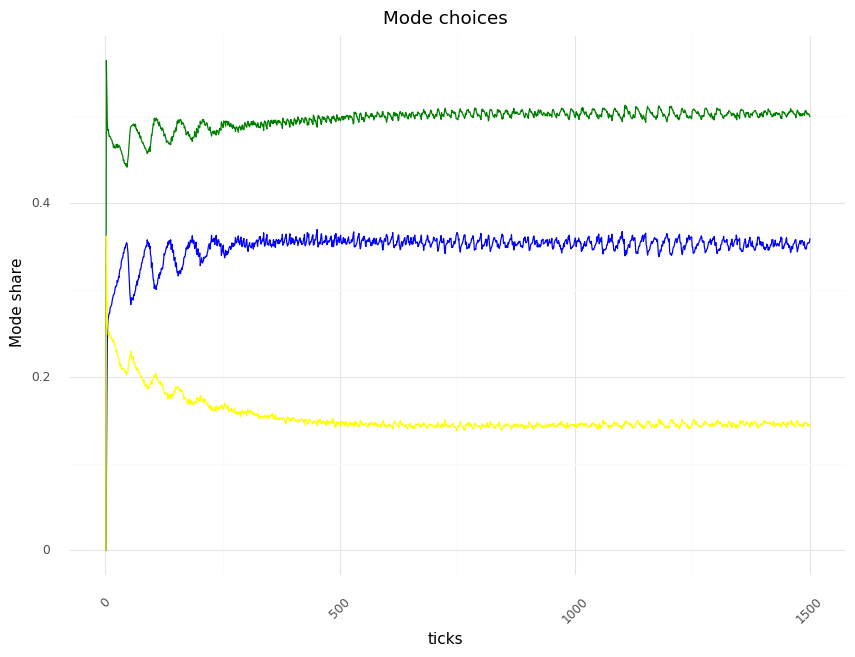

<ggplot: (356265904)>

In [232]:
ModeShares

### Mode shares for seperate runs

In [121]:
Data1 = Data[Data.run == 1]
Data2 = Data[Data.run == 2]
Data3 = Data[Data.run == 3]
Data4 = Data[Data.run == 4]
Data5 = Data[Data.run == 5]
Data6 = Data[Data.run == 6]
Data7 = Data[Data.run == 7]
Data8 = Data[Data.run == 8]
Data9 = Data[Data.run == 9]
Data10 = Data[Data.run == 10]


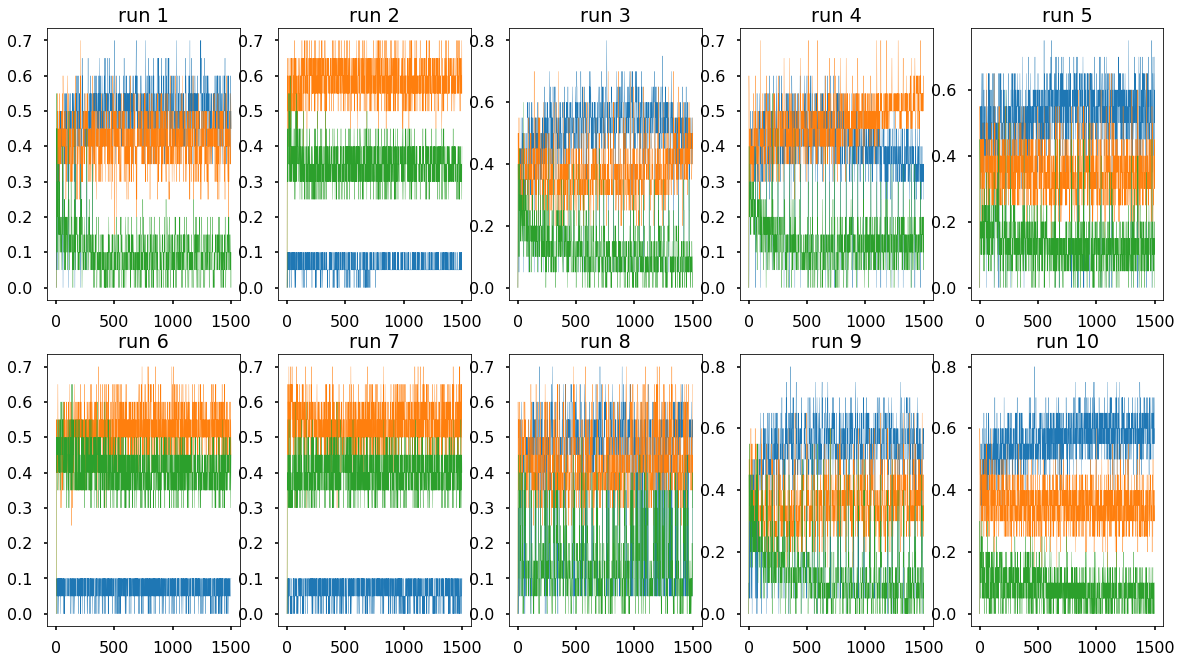

In [145]:
x = Data1.tick
y11 = Data1['Share of car users']
y12 = Data1['Share of bike users']
y13 = Data1['Share of bus users'] 

y21= Data2['Share of car users']
y22= Data2['Share of bike users']
y23= Data2['Share of bus users']

y31= Data3['Share of car users']
y32= Data3['Share of bike users']
y33= Data3['Share of bus users']

y41= Data4['Share of car users']
y42= Data4['Share of bike users']
y43= Data4['Share of bus users']

y51= Data5['Share of car users']
y52= Data5['Share of bike users']
y53= Data5['Share of bus users']

y61= Data6['Share of car users']
y62= Data6['Share of bike users']
y63= Data6['Share of bus users']

y71= Data7['Share of car users']
y72= Data7['Share of bike users']
y73= Data7['Share of bus users']

y81= Data8['Share of car users']
y82= Data8['Share of bike users']
y83= Data8['Share of bus users']

y91= Data9['Share of car users']
y92= Data9['Share of bike users']
y93= Data9['Share of bus users']

y101= Data10['Share of car users']
y102= Data10['Share of bike users']
y103= Data10['Share of bus users']




fig = plt.figure(figsize=(20,11))

ax1 = fig.add_subplot(2, 5, 1)
ax2 = fig.add_subplot(2,5,2)
ax3 = fig.add_subplot(2,5,3)
ax4 = fig.add_subplot(2,5,4)
ax5 = fig.add_subplot(2,5,5)
ax6 = fig.add_subplot(2, 5, 6)
ax7 = fig.add_subplot(2,5,7)
ax8 = fig.add_subplot(2,5,8)
ax9 = fig.add_subplot(2,5,9)
ax10 = fig.add_subplot(2,5,10)
ax1.plot(x, y11,  linewidth=0.3)
ax1.plot(x, y12, linewidth=0.3)
ax1.plot(x, y13, linewidth=0.3)

ax2.plot(x, y21, linewidth=0.3)
ax2.plot(x, y22,  linewidth=0.3)
ax2.plot(x, y23, linewidth=0.3)

ax3.plot(x, y31,  linewidth=0.3)
ax3.plot(x, y32,  linewidth=0.3)
ax3.plot(x, y33,  linewidth=0.3)

ax4.plot(x, y41,  linewidth=0.3)
ax4.plot(x, y42,  linewidth=0.3)
ax4.plot(x, y43, linewidth=0.3)

ax5.plot(x, y51, linewidth=0.3)
ax5.plot(x, y52,  linewidth=0.3)
ax5.plot(x, y53,  linewidth=0.3)

ax6.plot(x, y61, linewidth=0.3)
ax6.plot(x, y62,  linewidth=0.3)
ax6.plot(x, y63,  linewidth=0.3)

ax7.plot(x, y71, linewidth=0.3)
ax7.plot(x, y72,  linewidth=0.3)
ax7.plot(x, y73,  linewidth=0.3)

ax8.plot(x, y81, linewidth=0.3)
ax8.plot(x, y82,  linewidth=0.3)
ax8.plot(x, y83,  linewidth=0.3)

ax9.plot(x, y91, linewidth=0.3)
ax9.plot(x, y92,  linewidth=0.3)
ax9.plot(x, y93,  linewidth=0.3)

ax10.plot(x, y101, linewidth=0.3)
ax10.plot(x, y102,  linewidth=0.3)
ax10.plot(x, y103,  linewidth=0.3)



ax1.set_title('run 1')
ax2.set_title('run 2')
ax3.set_title('run 3')
ax4.set_title('run 4')
ax5.set_title('run 5')
ax6.set_title('run 6')
ax7.set_title('run 7')
ax8.set_title('run 8')
ax9.set_title('run 9')
ax10.set_title('run 10')


plt.show()

### save as PNG's


In [193]:
InfluencesHist.save(filename = 'HistInfluenced.png', height=7, width=10, units = 'in', dpi=1000)

In [214]:
figchangebeliefs.save(filename = 'ChangeBeliefs.png', height=7, width=10, units = 'in', dpi=1000)

In [387]:
OpinionSpace.save(filename = 'OpinionSpace.png', height=7, width=10, units = 'in', dpi=1000)

In [191]:
OpinionSpaceCarFun.save(filename = 'OpinionSpaceCarFun.png', height=7, width=10, units = 'in', dpi=1000)

In [192]:
OpinionSpaceEnvBus.save(filename = 'OpinionSpaceEnvBus.png', height=7, width=10, units = 'in', dpi=1000)

In [217]:
ModeShares.save(filename = 'ModeShares.png', height=7, width=10, units = 'in', dpi=1000)

In [13]:
OpinionSpaceValues.save(filename = 'OpinionSpaceValues.png', height=7, width=10, units = 'in', dpi=1000)